# LSTM Video Classification

In [193]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras import optimizers
from keras.layers import TimeDistributed
from time import time
from keras.callbacks import TensorBoard

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [143]:
from numpy.random import RandomState
import pandas as pd
df = pd.read_csv(r'avsr_test_data_v1.csv')
df = df.fillna(0)
rng = RandomState()
train = df.sample(frac=0.7, random_state=rng)
test = df.sample(frac=0.3, random_state=rng)

In [144]:
train.shape

(471, 234)

In [145]:
Y_Train = train['label']
Y_train = np.array(Y_Train)

In [146]:
Y_Test  = test['label']
Y_test = np.array(Y_Test)

In [147]:
Y_Test

639    6
490    0
153    7
509    0
4      2
      ..
237    6
33     6
650    3
268    4
155    2
Name: label, Length: 202, dtype: int64

In [148]:
X_train = train.drop(['label'], axis=1)
for x in range(40,233):
    X_train = X_train.drop([str(x)], axis=1)
X_train = np.array(X_train)

In [149]:
X_test = test.drop(['label'], axis=1)
for x in range(40,233):
    X_test = X_test.drop([str(x)], axis=1)
X_test = np.array(X_test)

In [150]:
dct = dict()
for i in Y_test:
    dct[i] = dct.get(i,0) + 1
print(dict(sorted(dct.items(), key=lambda item: item[1])))

print("y_tr1 rows, cols =", len(Y_train))
print("y_val1 rows, cols =", len(Y_test))
print("x_tr rows, cols =", len(X_train), len(X_train[0]))
print("x_val rows, cols =", len(X_test), len(X_test[0]))

# print("y_val1 =",y_val1)
x_train_dup = X_train
y_train_dup = Y_train

x_val_dup = X_test
y_val_dup = Y_test

# x_train_list = list(list())
# for i in range(0,len(x_tr)):
#     tmp = list()
#     for j in range(0,len(x_tr[i])):
#         tmp.append(x_tr[i][j])
#     x_train_list.append(tmp)
    
# print(x_train_list)
# print(x_tr)



dct = dict()
for i in range(0,9):
    count = 0
    tmp = list()
    for j in range(0, len(Y_test)):
        if(Y_test[j] == i):
            count +=1;
        if(count > 21 and Y_test[j] == i):
            x_train_dup = np.vstack([x_train_dup, x_val_dup[j]])
            y_train_dup = np.append(y_train_dup, Y_test[j])
            
            tmp.append(j)
    dct[i] = tmp

# print(len(x_train_dup), len(x_tr), len(y_train_dup), len(y_tr1))
# print(len(x_val_dup), len(x_val), len(y_val_dup), len(y_val1))
# #print(dct)
#print(dct.values())
index_list = list()
for i in dct.values():
    for j in i:
        index_list.append(j)
index_list.sort(reverse=True)
print(index_list)
for i in index_list:
    x_val_dup = np.delete(x_val_dup, (i), axis=0)
    y_val_dup = np.delete(y_val_dup, (i), axis=0)
   # Y_test.pop(i)
print(len(x_train_dup), len(X_train), len(y_train_dup), len(Y_train))
print(len(x_val_dup), len(X_test), len(y_val_dup), len(Y_test))

{1: 21, 4: 22, 7: 23, 3: 24, 6: 25, 5: 25, 2: 27, 0: 35}
y_tr1 rows, cols = 471
y_val1 rows, cols = 202
x_tr rows, cols = 471 40
x_val rows, cols = 202 40
[201, 200, 199, 198, 197, 196, 195, 194, 193, 191, 190, 189, 186, 185, 183, 181, 178, 177, 168, 163, 160, 159, 156, 153, 150, 140, 130, 123, 122, 117, 115, 99, 95, 87]
505 471 505 471
168 202 168 202


In [151]:
import numpy as np
v = np.array(x_train_dup)

In [152]:
v=v.reshape(505*8,5)

In [153]:
v = np.array(v)
v=v.reshape(505,8,5)

In [154]:
X_train = v

In [155]:
v = np.array(x_val_dup)
v=v.reshape(168*8,5)
v = pd.DataFrame(v)
#v.drop(v.columns[[11,12,13,14]],axis=1,inplace=True)
X_test = np.array(X_test)
X_test=v
X_test.shape

(1344, 5)

In [156]:
X_train = np.array(X_train)
X_train = X_train.reshape(505*8,5)

In [157]:
X_test = np.array(X_test)
X_test=X_test.reshape(168*8,5)

In [158]:
X_train[0]

array([1.07500005, 1.47599995, 1.50399995, 1.25399995, 1.38300002])

In [159]:
dat_fi=np.array([])
for a in range(4040):
    for b in range(5):
        if b==0:
            first =  X_train[a][b]
        else:
            second = X_train[a][b]
            ec = first - second
            dat_fi = np.append(dat_fi,ec,axis=None)
            first =second
            
dat_fj = np.array([])
for c in range(1344):
    for b in range(5):
        if b==0:
            first =  X_test[c][b]
        else:
            second = X_test[c][b]
            ec = first - second
            dat_fj = np.append(dat_fj,ec,axis=None)
            first =second

In [160]:
X_train = dat_fi.reshape(505,8,4)

In [161]:
X_test = dat_fj.reshape(168,8,4)

In [162]:
X_train[0][0]

array([-0.4009999 , -0.028     ,  0.25      , -0.12900007])

In [163]:
Y_train = np.array(y_train_dup)

In [164]:
Y_train.shape

(505,)

In [165]:
Y_test = np.array(y_val_dup)

In [166]:
Y_test

array([6, 0, 7, 0, 2, 0, 7, 5, 2, 6, 3, 1, 5, 2, 2, 6, 1, 3, 6, 2, 5, 0,
       2, 1, 3, 0, 1, 0, 6, 0, 3, 1, 6, 0, 1, 4, 6, 4, 5, 0, 4, 0, 2, 1,
       0, 2, 7, 7, 6, 5, 0, 3, 4, 5, 3, 0, 1, 5, 6, 5, 4, 7, 0, 7, 2, 7,
       2, 3, 1, 2, 4, 6, 4, 7, 0, 4, 0, 2, 0, 0, 2, 0, 5, 0, 3, 7, 0, 7,
       1, 2, 1, 1, 4, 2, 1, 6, 5, 6, 6, 4, 5, 2, 1, 7, 4, 7, 4, 3, 5, 3,
       5, 2, 1, 3, 4, 4, 4, 5, 4, 1, 6, 7, 7, 5, 4, 6, 2, 3, 7, 3, 1, 6,
       7, 1, 3, 2, 2, 7, 2, 5, 5, 5, 1, 6, 5, 4, 7, 1, 7, 3, 6, 4, 5, 3,
       7, 3, 3, 3, 5, 6, 3, 4, 6, 6, 7, 4, 3, 1])

In [167]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
Y_train = lb_make.fit_transform(Y_train)
Y_test = lb_make.fit_transform(Y_test)

In [168]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train.shape


(505, 8)

In [182]:
from keras.layers.normalization import BatchNormalization
#callbacks1 = [callbacks11,callbacks21]
model1 = Sequential()

model1.add(LSTM(128,input_shape=(8,4),return_sequences=True,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(LSTM(256,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(Dense(512))
model1.add(Dropout(0.4))
model1.add(Dense(1024))
model1.add(Dense(8,activation='softmax'))


# model1 = Sequential()

# model1.add(LSTM(128,input_shape=(8,4),return_sequences=True,activation='relu'))
# model1.add(BatchNormalization())
# model1.add(Dropout(0.3))
# model1.add(LSTM(256,activation='relu'))
# model1.add(BatchNormalization())
# model1.add(Dropout(0.275))
# model1.add(Dense(1024,activation='relu'))
# model1.add(BatchNormalization())
# model1.add(Dropout(0.3))
# model1.add(Dense(512,activation='relu'))
# model1.add(BatchNormalization())
# model1.add(Dropout(0.3))
# model1.add(Dense(64,activation='relu'))
# model1.add(BatchNormalization())
# model1.add(Dropout(0.3))
# model1.add(Dense(8,activation='softmax'))

# input_video = Input(shape=(8,4))
# y = LSTM(128,input_shape=(8,4),return_sequences=True,activation='relu')(input_video)

# #y = Dense(512, activation='relu')(y)
# y1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(y)
# y1 = Dropout(0.4)(y1)
# y1 = LSTM(256,activation='relu')(y1)
# #y1 = BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer="zeros",gamma_initializer="ones",moving_mean_initializer="zeros",moving_variance_initializer="ones",beta_regularizer=None,gamma_regularizer=None,beta_constraint=None,gamma_constraint=None,renorm=False,renorm_clipping=None,renorm_momentum=0.99,fused=None,trainable=True,virtual_batch_size=None, adjustment=None, name=None)(y1)
# y1 = Dropout(0.4)(y1)
# y1 = Dense(512, activation='relu')(y1)
# y1 = Dense(8, activation='softmax')(y1)
# model1 = Model(inputs=input_video, outputs=y1)

In [183]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [184]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 8, 128)            68096     
_________________________________________________________________
batch_normalization_29 (Batc (None, 8, 128)            512       
_________________________________________________________________
dropout_40 (Dropout)         (None, 8, 128)            0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 256)               394240    
_________________________________________________________________
batch_normalization_30 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_41 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)             

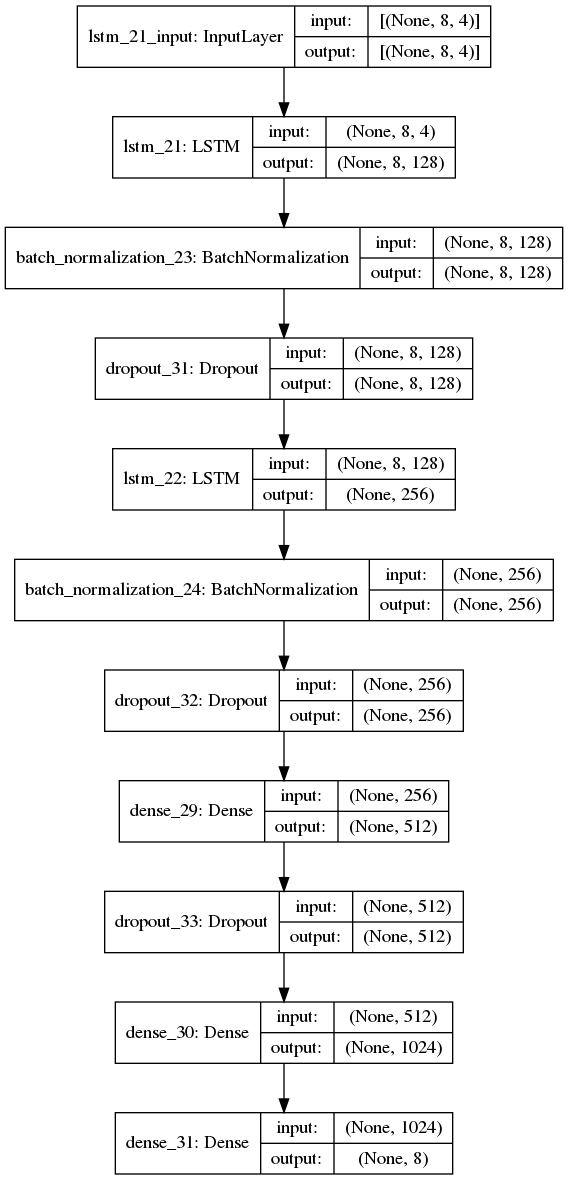

In [172]:
from keras.utils import plot_model
plot_model(model1, to_file='Video_model_plot_Kannada.png', show_shapes=True, show_layer_names=True)

In [185]:
history = model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=70,callbacks=[tensorboard])

Epoch 1/70
16/16 [==============================] - 3s 80ms/step - loss: 3.2681 - accuracy: 0.1698 - val_loss: 2.0785 - val_accuracy: 0.1250
Epoch 2/70
16/16 [==============================] - 1s 53ms/step - loss: 3.0440 - accuracy: 0.2399 - val_loss: 2.0881 - val_accuracy: 0.1250
Epoch 3/70
16/16 [==============================] - 1s 41ms/step - loss: 3.0169 - accuracy: 0.2471 - val_loss: 2.1048 - val_accuracy: 0.1548
Epoch 4/70
16/16 [==============================] - 1s 42ms/step - loss: 2.9052 - accuracy: 0.2046 - val_loss: 2.1142 - val_accuracy: 0.1310
Epoch 5/70
16/16 [==============================] - 1s 41ms/step - loss: 2.6874 - accuracy: 0.2528 - val_loss: 2.1054 - val_accuracy: 0.1250
Epoch 6/70
16/16 [==============================] - 1s 40ms/step - loss: 2.6432 - accuracy: 0.2326 - val_loss: 2.1146 - val_accuracy: 0.1667
Epoch 7/70
16/16 [==============================] - 1s 42ms/step - loss: 2.2831 - accuracy: 0.2663 - val_loss: 2.1301 - val_accuracy: 0.1250
Epoch 8/70
16

Epoch 59/70
16/16 [==============================] - 1s 40ms/step - loss: 0.7720 - accuracy: 0.6804 - val_loss: 1.4168 - val_accuracy: 0.7083
Epoch 60/70
16/16 [==============================] - 1s 41ms/step - loss: 0.7586 - accuracy: 0.7665 - val_loss: 1.3208 - val_accuracy: 0.6964
Epoch 61/70
16/16 [==============================] - 1s 41ms/step - loss: 0.7712 - accuracy: 0.7290 - val_loss: 1.4943 - val_accuracy: 0.6786
Epoch 62/70
16/16 [==============================] - 1s 42ms/step - loss: 0.7374 - accuracy: 0.7642 - val_loss: 1.4990 - val_accuracy: 0.6964
Epoch 63/70
16/16 [==============================] - 1s 41ms/step - loss: 0.7773 - accuracy: 0.7339 - val_loss: 1.2849 - val_accuracy: 0.6786
Epoch 64/70
16/16 [==============================] - 1s 42ms/step - loss: 0.8206 - accuracy: 0.7066 - val_loss: 1.4107 - val_accuracy: 0.6548
Epoch 65/70
16/16 [==============================] - 1s 42ms/step - loss: 0.7296 - accuracy: 0.7496 - val_loss: 1.3356 - val_accuracy: 0.7440
Epoch 

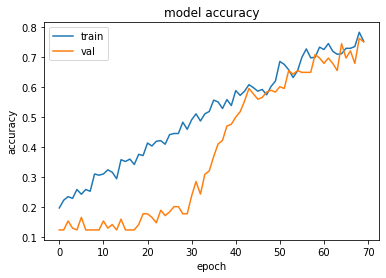

In [186]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('Video_Kannada Model accuracy.jpg')
plt.show()

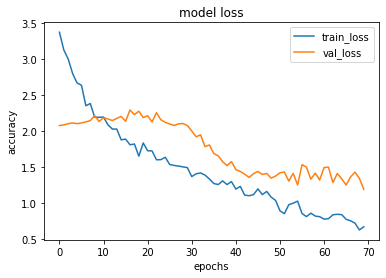

In [187]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.savefig('Video_Kannada Model Loss.jpg')
plt.show()

In [188]:
predict_prob=model1.predict(X_test)
predict_classes=np.argmax(predict_prob,axis=1)
predict_classes
score, acc = model1.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 11ms/step - loss: 1.1903 - accuracy: 0.7500


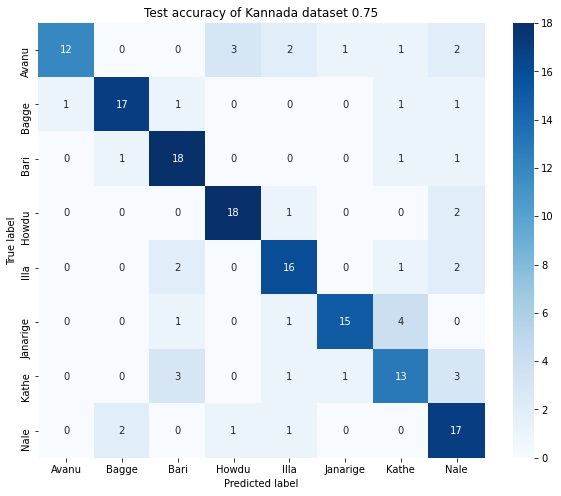

In [191]:
y_val1 = list()
for i in Y_test:
    count = 0
    for j in i:
        if( j == 1):
            y_val1.append(count);
        count +=1;
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
words_list = ['Avanu','Bagge','Bari', 'Howdu','Illa', 'Janarige', 'Kathe', 'Nale']
lb = LabelEncoder()
y_pred = lb_make.fit_transform(predict_classes)
Y_Test = lb_make.fit_transform(y_val1)
cm = confusion_matrix(Y_Test, y_pred)
cm_df = pd.DataFrame(cm,index =words_list,columns = words_list)
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title('Test accuracy of Kannada dataset {}'.format(acc))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('Video_Kannada Confusion Matrix.jpg')
plt.show()

In [192]:
from sklearn.metrics import classification_report
y_pred = lb_make.fit_transform(predict_classes)
Y_Test = lb_make.fit_transform(Y_Test)
print(classification_report(Y_Test, y_pred, target_names=words_list))

              precision    recall  f1-score   support

       Avanu       0.92      0.57      0.71        21
       Bagge       0.85      0.81      0.83        21
        Bari       0.72      0.86      0.78        21
       Howdu       0.82      0.86      0.84        21
        Illa       0.73      0.76      0.74        21
    Janarige       0.88      0.71      0.79        21
       Kathe       0.62      0.62      0.62        21
        Nale       0.61      0.81      0.69        21

    accuracy                           0.75       168
   macro avg       0.77      0.75      0.75       168
weighted avg       0.77      0.75      0.75       168



In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
model1.save('kannada_model_video_v1.h5')#creates a HDF5 file 'my_model.h5'


In [ ]:
model_json = model1.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)